# Plot Energy/PE Spectra of Single Ar39 (10M simulations)
In this notebook, we aim to plot the spectrum of single Ar39 decays from a population of 10M events (*by CJ on 06-14-2020*).
In the following, we load the all data in ROI (*all entries within +-700, +-845*)

In [1]:
import os, numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

In [2]:
def load_dataframe_from_files(dirin, fileprefix):
    import glob
    files = glob.glob(os.path.join(dirin, fileprefix))
    print("[Info] Loading {}".format(files[0]))
    dtype={"kineticenergy": "float64", 
           'PID': "int", 'ParentTrackID': "int", 
           'energydeposition': "float64", 'kineticenergy': "float64", 
           'time': "float64",
           'x': "float64", 'y': "float64", 'z': "float64", 
           'px': "float64", 'py': "float64", 'pz': "float64", 
           'eventnumber': "int", 'tracknumber': "int",
           'creatorprocess': "string", 'parentnucleusPID': "int", 
           'detectionefficiency': "float64"}
    df = pd.read_csv(files[0], comment='#', index_col=False, dtype=dtype)
    for file in files[1:]:
        print("[Info] Loading {}".format(file))
        dftmp = pd.read_csv(file, comment='#', index_col=False, dtype=dtype)
        df = pd.concat([df, dftmp])
    return df

In [5]:
# Aggregation of 4 Ar39 decays for each snapshot
dirin = os.path.join("..", "..", "Data", "ar39", "06-14-2020-10M")
prefix_1Ar39_files = "roi_RndSeed123456789_part1_part*.csv"

df1 = load_dataframe_from_files(dirin, prefix_1Ar39_files)
df1[df1.columns[:-1]]

print("[Info] Loaded datasets (all roi entries)")
print("[Info] 1 Ar39: {} entries, {} events".format(len(df1), df1.eventnumber.nunique()))

[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part1.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part2.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part3.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part4.csv
[Info] Loading ../../Data/ar39/06-14-2020-10M/roi_RndSeed123456789_part1_part5.csv
[Info] Loaded datasets (all roi entries)
[Info] 1 Ar39: 12175353 entries, 9832142 events


In [8]:
df1["pedetected"] = round(df1.energydeposition * df1.detectionefficiency * 40 * .40)

In [24]:
edep_per_event = df1.groupby("eventnumber").energydeposition.sum()
edep_per_detected_event = df1[df1.pedetected>0].groupby("eventnumber").energydeposition.sum()

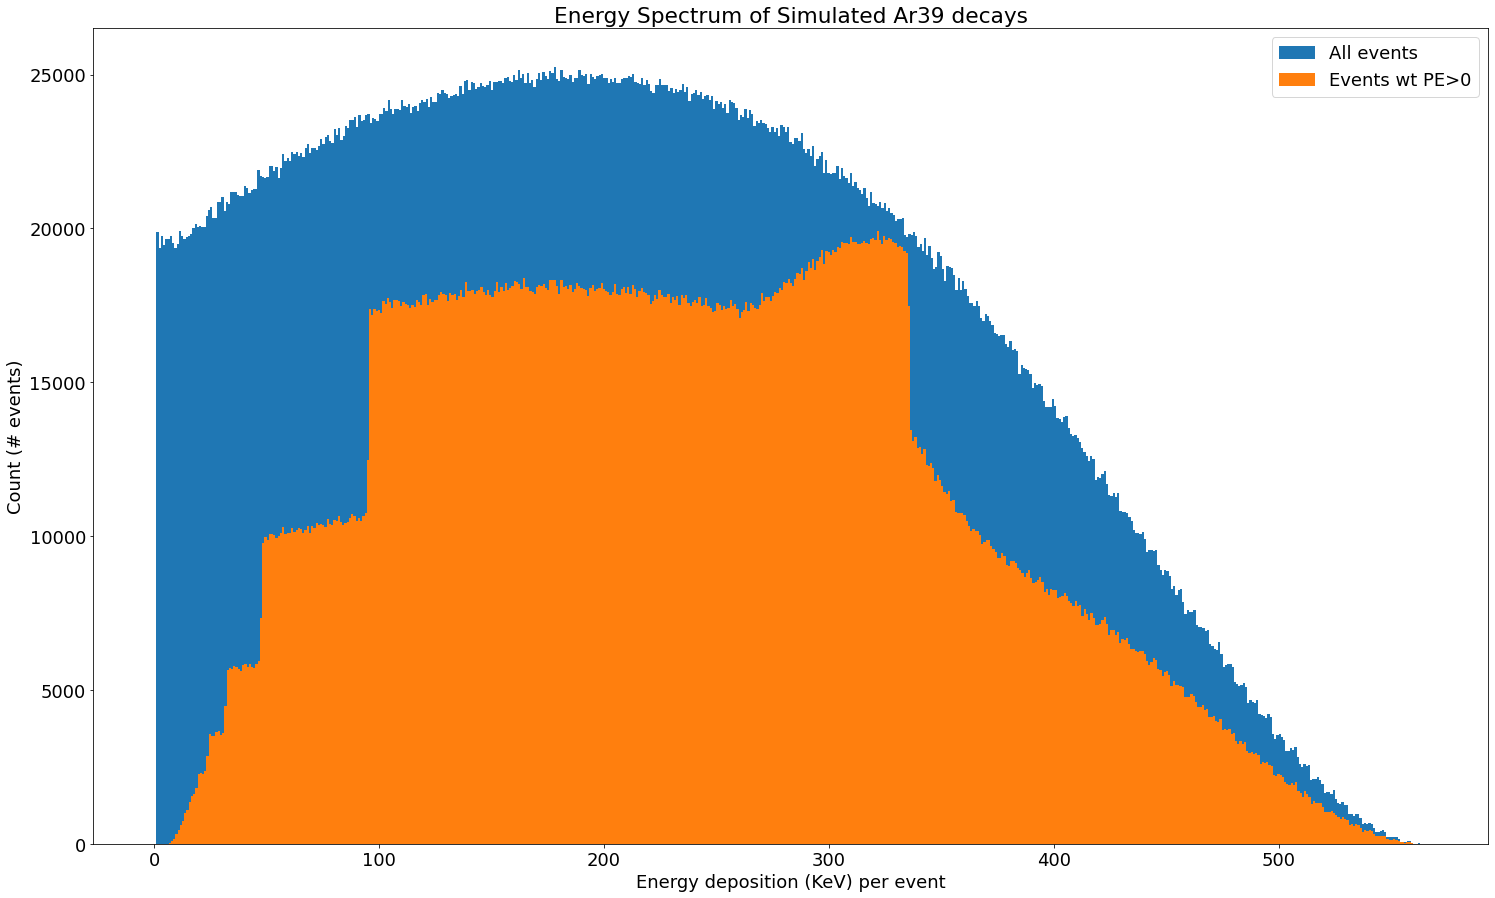

In [30]:
plt.hist(edep_per_event, bins=565, label="All events")
plt.hist(edep_per_detected_event, bins=565, label="Events wt PE>0")
plt.title("Energy Spectrum of Simulated Ar39 decays")
plt.xlabel("Energy deposition (KeV) per event")
plt.ylabel("Count (# events)")
plt.legend()
plt.show()

In [9]:
pedet_per_event = df1.groupby("eventnumber").pedetected.sum()

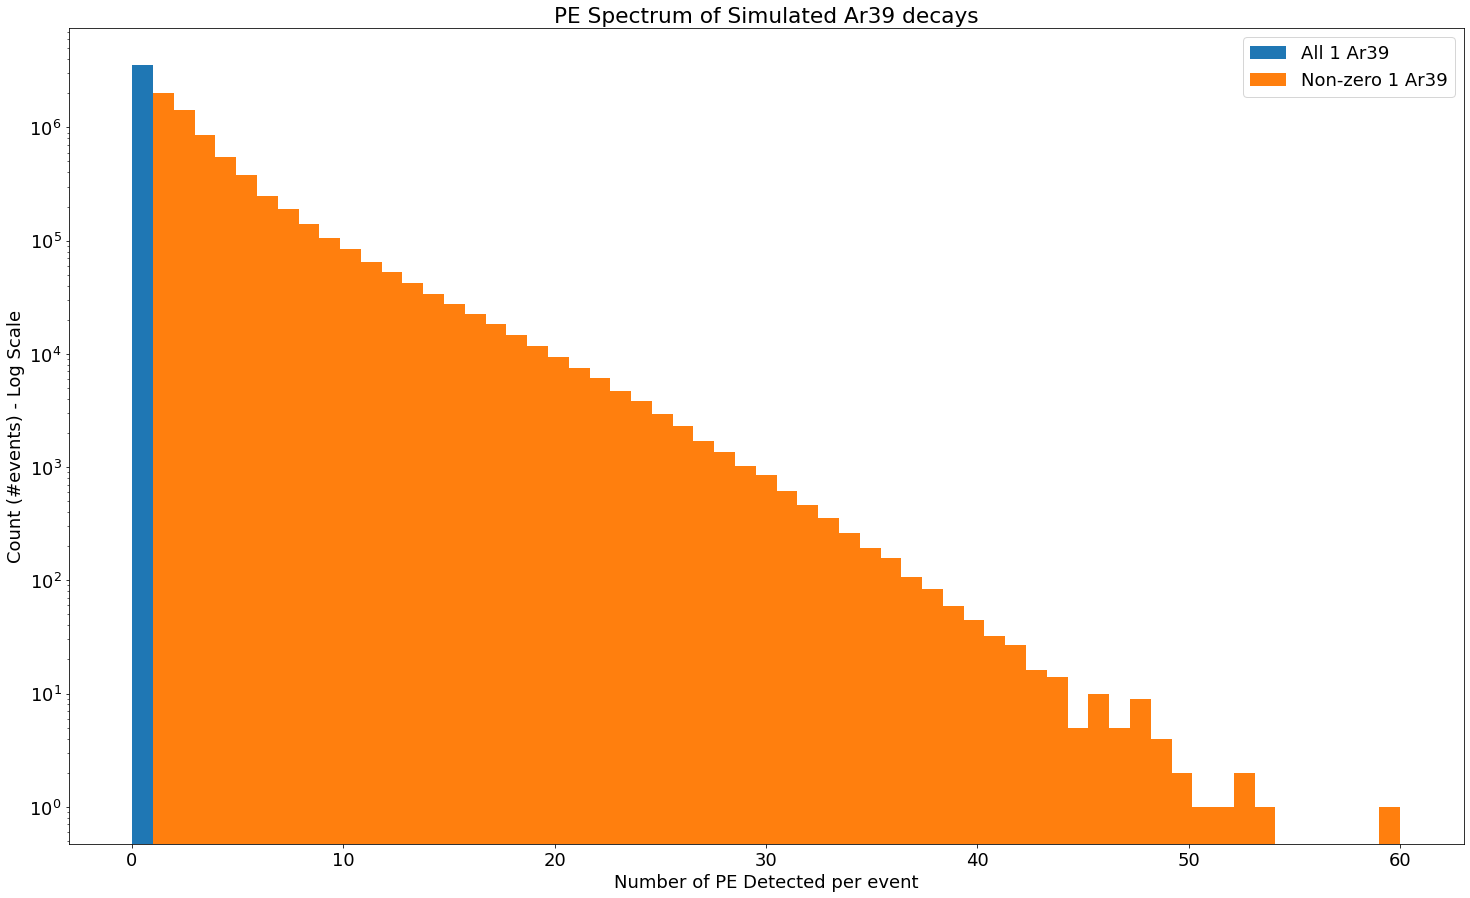

In [31]:
plt.hist(pedet_per_event, bins=61, label="All 1 Ar39")
plt.hist(pedet_per_event[pedet_per_event>0], bins=60, label="Non-zero 1 Ar39")
plt.yscale("log")
plt.title("PE Spectrum of Simulated Ar39 decays")
plt.xlabel("Number of PE Detected per event")
plt.ylabel("Count (#events) - Log Scale")
plt.legend()
plt.show()

In [16]:
len(pedet_per_event[pedet_per_event>0]) / len(pedet_per_event)

0.6416759440618331